In [177]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import compare_j

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Sample data and fitting a regression model
# Replace this with your data

df = pd.read_csv('50_Startups.csv')
df = pd.DataFrame(dataset)

In [178]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [182]:
X = df.drop(['Profit', 'State'], axis='columns')
y = df['Profit']  # Dependent variable

In [183]:
columns = X.columns

In [181]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [163]:
columns = X.columns

In [164]:
# Check the summary to see initial results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.53e-30
Time:                        14:57:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353     

## 1. Linearity
To check linearity, we can plot the actual values vs. the predicted values or look at residuals vs. predicted values.

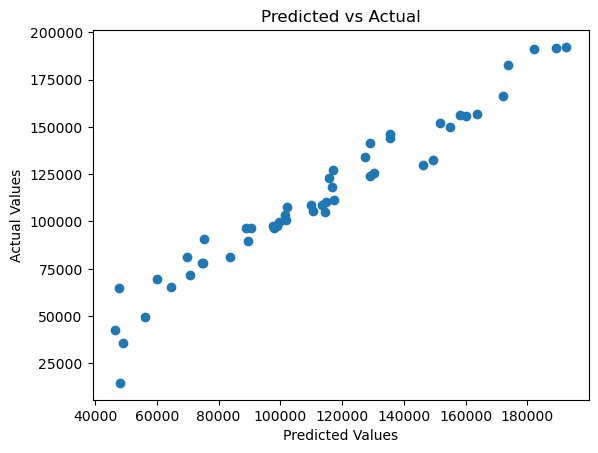

In [165]:
# Predicted vs Actual
plt.scatter(model.fittedvalues, y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual")
plt.show()

## 2. Independence of Errors

In [166]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.2817662007267272


## 3. Homoscedasticity
We can visualize homoscedasticity by plotting residuals vs. predicted values. A random scatter (no pattern) indicates constant variance.

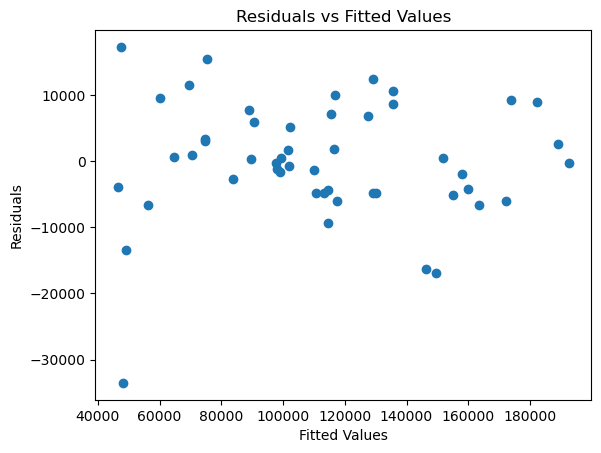

In [167]:
# Residual plot
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

## Breusch-Pagan, a statistical tests for homoscedasticity

In [168]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan test p-value: {bp_test[1]}')  # p < 0.05 indicates heteroscedasticity

Breusch-Pagan test p-value: 0.3729120367538378


## 4. Normality of Errors
To check if the residuals are normally distributed, we can use a histogram, Q-Q plot, or Shapiro-Wilk test.

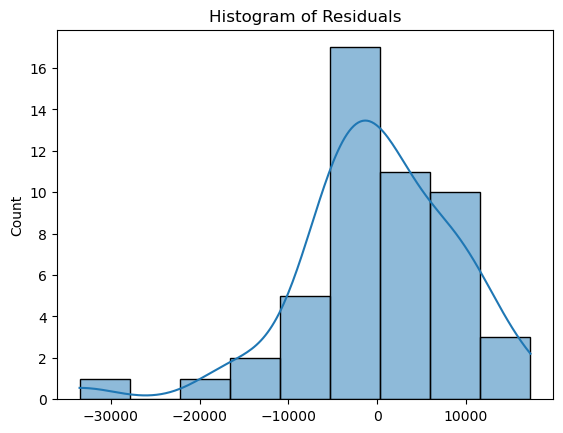

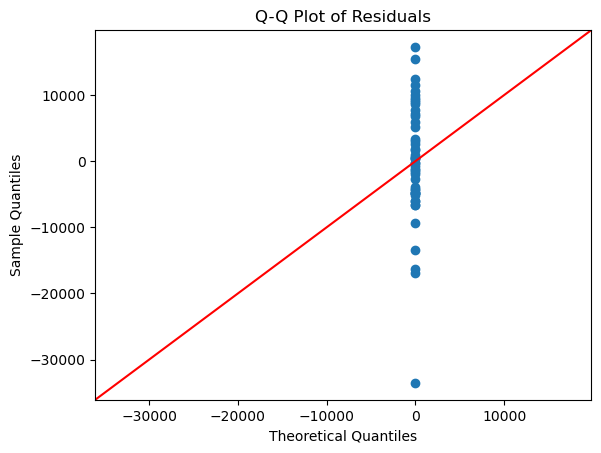

In [171]:
# Histogram of residuals
sns.histplot(model.resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
sm.qqplot(model.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [172]:
# Shapiro-Wilk test
from scipy.stats import shapiro

shapiro_test = shapiro(model.resid)
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')  # p > 0.05 indicates normality

Shapiro-Wilk test p-value: 0.01044414471834898


## 4. Multicollinearity

In [189]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           Feature       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984
